# Train a model from preprosseing data

### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import pickle

### Read Processed data

In [2]:
trainDataPath = os.path.join(os.path.curdir, 'data', 'processed', 'train.csv')
testDataPath = os.path.join(os.path.curdir, 'data', 'processed', 'test.csv')
df = pd.read_csv(trainDataPath)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,PassengerId,Survived,Age,Fare,FamilySize,IsMother,Ismale,Pclass_1,Pclass_2,Pclass_3,...,Title_Sir,AgeState_Adult,AgeState_Child,FareBin_veryLow,FareBin_Low,FareBin_high,FareBin_veryHigh,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,2,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,2,1,38.0,71.2833,2,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,3,1,26.0,7.9250,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,4,1,35.0,53.1000,2,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,5,0,35.0,8.0500,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [5]:
X = df.drop(columns=['Survived'], axis=1)
Y = df.Survived
Xtest = pd.read_csv(testDataPath)

In [6]:
Xtest.head()

,PassengerId,Age,Fare,FamilySize,IsMother,Ismale,Pclass_1,Pclass_2,Pclass_3,Title_Lady,...,Title_Sir,AgeState_Adult,AgeState_Child,FareBin_veryLow,FareBin_Low,FareBin_high,FareBin_veryHigh,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,7.8292,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,893,47.0,7.0000,2,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,894,62.0,9.6875,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,895,27.0,8.6625,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,896,22.0,12.2875,3,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [7]:
X.shape, Y.shape

((891, 25), (891,))

### Create Models

In [8]:
# Create models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDR', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NMN', MultinomialNB()))
models.append(('NBG', GaussianNB()))
models.append(('NBB', BernoulliNB()))
models.append(('RFC', RandomForestClassifier(n_estimators=300, max_features=3)))


### Train Models

In [9]:
results = []
modelNames = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    crossValResults = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    modelNames.append(name)
    results.append(crossValResults)
    print(f"{name} : {crossValResults.mean()}")

LR : 0.8294257178526843
LDR : 0.832796504369538
SVM : 0.5959550561797753
DTC : 0.7519475655430712
KNN : 0.6341323345817728
NMN : 0.6744943820224718
NBG : 0.780087390761548
NBB : 0.7834082397003745
RFC : 0.8204619225967541


In [10]:
# Grid search for algorithm tuning
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.40537523514145307
1.0


### Compare Algorithms

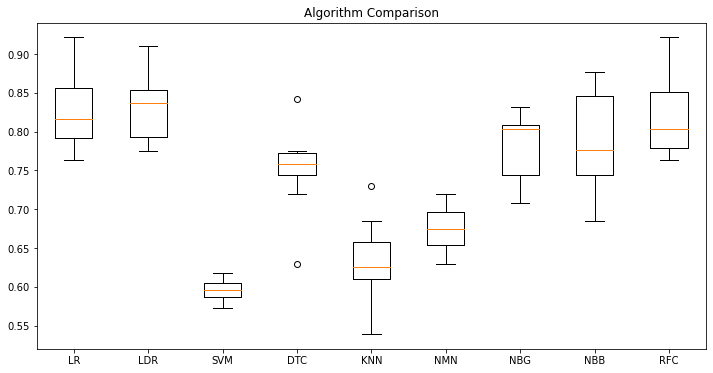

In [11]:
# Compare Algorithms
""" Here clearly seen that LinearDiscriminetAnalysis(LDR) is best model """
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=modelNames)
plt.title('Algorithm Comparison')
plt.show()

In [12]:
# Make LDA predictions on validation dataset
FinalModel = LinearDiscriminantAnalysis()
FinalModel.fit(X, Y)
predictionsLDA = FinalModel.predict(Xtest)

In [13]:
survivedPred = pd.DataFrame(predictionsLDA)
survivedPred.columns = ['SurvivedPred']

In [14]:
survivedPred.head()

,SurvivedPred
0,0
1,1
2,0
3,0
4,1


In [15]:
df1 = pd.concat([Xtest, survivedPred], axis=1)


In [16]:
df1.head(10)

,PassengerId,Age,Fare,FamilySize,IsMother,Ismale,Pclass_1,Pclass_2,Pclass_3,Title_Lady,...,AgeState_Adult,AgeState_Child,FareBin_veryLow,FareBin_Low,FareBin_high,FareBin_veryHigh,Embarked_C,Embarked_Q,Embarked_S,SurvivedPred
0,892,34.5,7.8292,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
1,893,47.0,7.0000,2,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
2,894,62.0,9.6875,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,895,27.0,8.6625,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,896,22.0,12.2875,3,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,1
5,897,14.0,9.2250,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6,898,30.0,7.6292,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
7,899,26.0,29.0000,3,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
8,900,18.0,7.2292,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
9,901,21.0,24.1500,3,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


### Dataframe save to csv

In [20]:
# df1.to_csv('./data/test_with_survived_predicted_values.csv')
# Only survived condidate detail in test data
# df1[df1.SurvivedPred==0].to_csv('./data/processed/candidate_who_didnot_survived_detail.csv')

### Save model

In [18]:
# pickle.dump(FinalModel, open('Titanic_survival_prediction_model.sav', 'wb'))